<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Assignment%20Maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - Maths and Descriptive Statistics -  Piramu M**

Load the data csv file

In [11]:
import pandas as pd

# Load the dataset
# Corrected the path with forward slash
fpath = "/content/Diamond .csv"
df = pd.read_csv(fpath)

# Display the first few rows to understand its structure
df.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335


**A.	Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.**

In [12]:
df1 = df.select_dtypes(include=['number'])
df2 = df.select_dtypes(exclude=['number'])

# Display the first few rows of each dataframe
df1.head(),df2.head()

(   carat  depth  table  weight  size  price
 0   0.23   61.5   55.0    3.95  3.98    326
 1   0.21   59.8   61.0    3.89  3.84    326
 2   0.23   56.9   65.0    4.05  4.07    327
 3   0.29   62.4   58.0    4.20  4.23    334
 4   0.31   63.3   58.0    4.34  4.35    335,
        cut color clarity
 0    Ideal     E     SI2
 1  Premium     E     SI1
 2     Good     E     VS1
 3  Premium     I     VS2
 4     Good     J     SI2)

**B1.	Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries **

In [15]:
import pandas as pd
import statistics # Import the statistics module

# Compute central tendency using Pandas
mean_pandas = df1.mean()
median_pandas = df1.median()
# Taking the first mode value if multiple exist
mode_pandas = df1.mode().iloc[0]
# Compute central tendency using statistics module
mean_stats = df1.apply(statistics.mean)
median_stats = df1.apply(statistics.median)
mode_stats = df1.apply(lambda x: statistics.mode(x) if len(x) > 0 else None)

# Create a DataFrame for comparison
central_tendency_df = pd.DataFrame({
    'Mean (Pandas)': mean_pandas,
    'Median (Pandas)': median_pandas,
    'Mode (Pandas)': mode_pandas,
    'Mean (Statistics)': mean_stats,
    'Median (Statistics)': median_stats,
    'Mode (Statistics)': mode_stats
})

central_tendency_df

,Mean (Pandas),Median (Pandas),Mode (Pandas),Mean (Statistics),Median (Statistics),Mode (Statistics)
carat,0.797940,0.70,0.30,0.797940,0.70,0.30
depth,61.749405,61.80,62.00,61.749405,61.80,62.00
table,57.457184,57.00,56.00,57.457184,57.00,56.00
weight,5.731157,5.70,4.37,5.731157,5.70,4.37
size,5.734526,5.71,4.34,5.734526,5.71,4.34
price,3932.799722,2401.00,605.00,3932.799722,2401.00,605.00


**B2.check if the calculated values are different between these 2 libraries.**

In [16]:
mean_diff = pd.DataFrame()
mean_diff['Mean Difference'] = central_tendency_df['Mean (Pandas)'] - central_tendency_df['Mean (Statistics)']
median_diff = pd.DataFrame()
median_diff['Median Difference'] = central_tendency_df['Median (Pandas)'] - central_tendency_df['Median (Statistics)']
mode_diff = pd.DataFrame()
mode_diff['Mode Difference'] = central_tendency_df['Mode (Pandas)'] - central_tendency_df['Mode (Statistics)']
print(median_diff), (mean_diff), (mode_diff)


        Median Difference
carat                 0.0
depth                 0.0
table                 0.0
weight                0.0
size                  0.0
price                 0.0


(None,
         Mean Difference
 carat     -1.110223e-16
 depth      7.105427e-15
 table      0.000000e+00
 weight     0.000000e+00
 size       0.000000e+00
 price      0.000000e+00,
         Mode Difference
 carat               0.0
 depth               0.0
 table               0.0
 weight              0.0
 size                0.0
 price               0.0)

**C.	Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.**




In [17]:
skewness = df1.skew()

# Categorize skewness levels based on thresholds
skewness_category = skewness.apply(lambda x:
    "Highly Skewed" if abs(x) > 1 else
    "Moderately Skewed" if 0.5 < abs(x) <= 1 else
    "Lightly Skewed"
)

# Create a DataFrame for better visualization
skewness_df = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness_category
})

print(skewness_df)

        Skewness Value  Skewness Category
carat         1.116646      Highly Skewed
depth        -0.082294     Lightly Skewed
table         0.796896  Moderately Skewed
weight        0.378676     Lightly Skewed
size          2.434167      Highly Skewed
price         1.618395      Highly Skewed


:**D.	Use the different transformation techniques to convert skewed data found in previous question into normal distribution.**

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

df_transformed = df1.copy()

# Apply transformations, use 'carat' instead of 'Carat'
df_transformed['reciprocal'] = 1 / (df_transformed['carat'] + 0.001)  # Avoid division by zero
df_transformed['power'] = np.power(df_transformed['carat'], 0.5)
df_transformed['power_4'] = np.power(df_transformed['carat'], 0.25)

qt = QuantileTransformer(output_distribution='normal')
df_transformed['quantile'] = qt.fit_transform(df_transformed[['carat']]) # Use 'carat' here as well

# Display results
print(df_transformed[['reciprocal', 'power', 'power_4', 'quantile']].head())

   reciprocal     power   power_4  quantile
0    4.329004  0.479583  0.692519 -2.747453
1    4.739336  0.458258  0.676947 -3.402659
2    4.329004  0.479583  0.692519 -2.747453
3    3.436426  0.538516  0.733837 -1.910600
4    3.215434  0.556776  0.746175 -1.280981


**E.	Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.**

In [18]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Apply function to all numeric columns
outliers = df1.apply(find_outliers)

# Display the first few rows of outliers
print(outliers.head())


    carat  depth  table  weight  size  price
2     NaN   56.9   65.0     NaN   NaN    NaN
8     NaN   65.1    NaN     NaN   NaN    NaN
24    NaN   58.1    NaN     NaN   NaN    NaN
35    NaN   58.2    NaN     NaN   NaN    NaN
42    NaN   65.2    NaN     NaN   NaN    NaN


**F.	Convert categorical variables into numerical variables using LabelEncoder technique.**

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in df2.columns:
    df2[col] = label_encoder.fit_transform(df2[col])

# Display the first few rows of the transformed dataset
print(df2.head())


   cut  color  clarity
0    2      1        3
1    3      1        2
2    1      1        4
3    3      5        5
4    1      6        3


**G.	Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.**

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mm = MinMaxScaler()

# Apply scalers
df_standard = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns)
df_minmax = pd.DataFrame(mm.fit_transform(df1), columns=df1.columns)

# Print first few rows
print("Standard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())


Standard Scaled Data:
       carat     depth     table    weight      size     price
0 -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -0.904095
1 -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -0.904095
2 -1.198168 -3.385019  3.375663 -1.498691 -1.457395 -0.903844
3 -1.071587  0.454133  0.242928 -1.364971 -1.317305 -0.902090
4 -1.029394  1.082358  0.242928 -1.240167 -1.212238 -0.901839

MinMax Scaled Data:
       carat     depth     table    weight      size     price
0  0.006237  0.513889  0.230769  0.367784  0.067572  0.000000
1  0.002079  0.466667  0.346154  0.362197  0.065195  0.000000
2  0.006237  0.386111  0.423077  0.377095  0.069100  0.000054
3  0.018711  0.538889  0.288462  0.391061  0.071817  0.000433
4  0.022869  0.563889  0.288462  0.404097  0.073854  0.000487


**H.	Create the Histogram for all numeric variables and draw the KDE plot on that.**

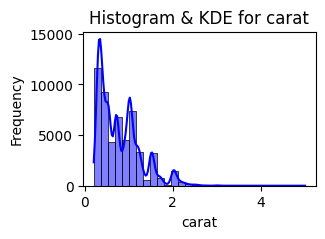

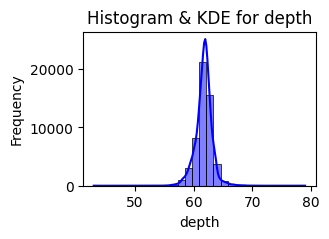

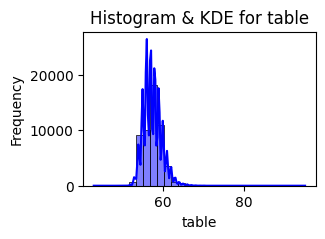

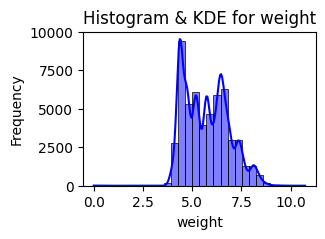

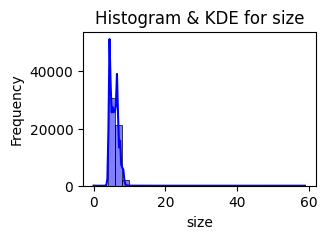

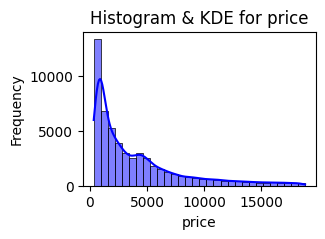

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
for col in df1.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram & KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


**I.	Check the correlation between all the numeric variables using HeatMapand try to draw some conclusion about the data.**

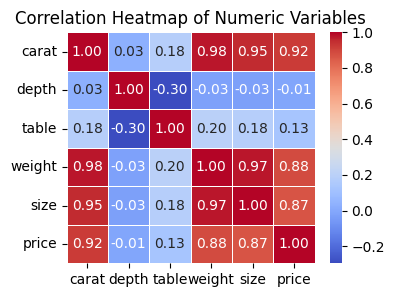

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


**Q2. Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent.**

Gradient Descent minimizes cost functions by updating parameters step by step.

Learning Rate (α) controls speed:

Too small → Slow convergence

Too large → May diverge

Just right → Efficient convergence

Types: Batch, Stochastic (SGD), and Mini-Batch.

Used In: Linear Regression, Neural Networks, Logistic Regression, etc.

Mathematical Representation
For a function
J(θ) (Cost Function), Gradient Descent updates the parameter
𝜃

# Cost Function: Mean Squared Error (MSE)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1/(2*m)) * np.sum((predictions - y) ** 2)

# Gradient Descent Function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        theta -= learning_rate * gradients  # Update theta
    return theta



